In [1]:


%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style('darkgrid')

c:\users\david\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv('C:\\Users\\david\Desktop\\thinkful datasets\\yelp_labelled.csv')

data.columns = ['text', 'sentiment']

data

,text,sentiment
0,Crust is not good.,0
1,Not tasty and the texture was just nasty.,0
2,Stopped by during the late May bank holiday of...,1
3,The selection on the menu was great and so wer...,1
4,Now I am getting angry and I want my damn pho.,0
5,Honeslty it didn't taste THAT fresh.),0
6,The potatoes were like rubber and you could te...,0
7,The fries were great too.,1
8,A great touch.,1
9,Service was very prompt.,1


### Positive Reviews

In [3]:

positive = ["delicious", "good", "recommended", "love", "awesome", "best", "excellent", "highly", "amazing", "great"]

for key in positive:
    data[key] = (data.text.str.contains(key, case=False)).astype(int)


In [4]:
#designates that someone REALLY loves something
data['allcaps'] = data.text.str.isupper()

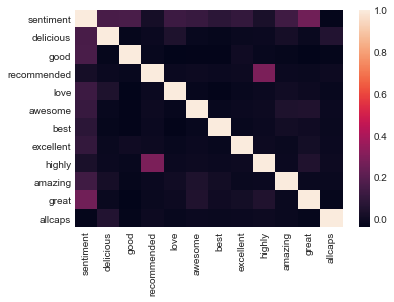

In [5]:
sns.heatmap(data.corr())

In [6]:
datat = data[positive + ['allcaps']]
target = data['sentiment']

In [7]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(datat, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(datat)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    datat.shape[0],
    (target != y_pred).sum()
))

print("Success rate of the first model was {}".format(1-((target != y_pred).sum() / datat.shape[0])))

Number of mislabeled points out of a total 999 points : 306
Success rate of the first model was 0.6936936936936937


### Data with Holdouts

In [8]:
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(datat, target, test_size=0.25, random_state=20)
print('With 25% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(datat, target).score(datat, target)))

With 25% Holdout: 0.68
Testing on Sample: 0.6936936936936937


### Cross Validation with multiple holdout groups

In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, datat, target, cv=10)

array([0.66      , 0.7       , 0.71      , 0.76      , 0.64      ,
       0.65      , 0.71      , 0.68      , 0.64      , 0.75757576])

In [10]:
# Test my model with different holdout groups.
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(datat, target, test_size=0.25, random_state=42)


# Classify, storing the result in a new variable and Fit our model to the data.
train_pred = bnb.fit(data_train, target_train).predict(data_train)
# Store the resulting confusion matrix in a new variable. 
train_confusion = pd.crosstab(target_train, train_pred)
# Display our results.
print("In the train group, the model incorrectly labeled {} points out of {} total points. It has a Sensitivity of {}% and a Specificity of {}%".format(
    (target_train != train_pred).sum(),
    data_train.shape[0],
    round(train_confusion[1][1]/train_confusion.loc[1].sum()*100),
    round(train_confusion[0][0]/train_confusion.loc[0].sum()*100)
))

# Classify, storing the result in a new variable and Fit our model to the data.
test_pred = bnb.fit(data_test, target_test).predict(data_test)
# Store the resulting confusion matrix in a new variable. 
test_confusion = pd.crosstab(target_test, test_pred)
# Display our results.
print("In the test group, the model incorrectly labeled {} points out of {} total points. It has a Sensitivity of {}%   and a Specificity of {}%".format(
    (target_test != test_pred).sum(),
    data_test.shape[0],
    round(test_confusion[1][1]/test_confusion.loc[1].sum()*100),
    round(test_confusion[0][0]/test_confusion.loc[0].sum()*100)
))

In the train group, the model incorrectly labeled 223 points out of 749 total points. It has a Sensitivity of 48.0% and a Specificity of 92.0%
In the test group, the model incorrectly labeled 84 points out of 250 total points. It has a Sensitivity of 37.0%   and a Specificity of 95.0%


In [11]:
y_pred = bnb.fit(datat, target).predict(datat)

# Display our results.
print("In total, the model incorrectly labeled {} points out of {} total points.".format(
    (target != y_pred).sum(),
    datat.shape[0]
))

df_confusion = pd.crosstab(target, y_pred)
print(df_confusion)

In total, the model incorrectly labeled 306 points out of 999 total points.
col_0        0    1
sentiment          
0          462   38
1          268  231


## Negative Classifier

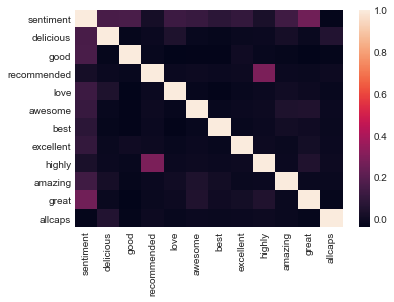

In [12]:

negative = ["awful", "suck", "terrible", "poor","bad", "worse", "disgusting", "worst", "gross"]

sns.heatmap(data.corr())

In [13]:
for word in negative:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    data[str(word)] = data.text.str.contains(
        str(word).lower(),
        case=False
    )

In [14]:
datat = data[negative]
target = data['sentiment']

In [15]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Classify, storing the result in a new variable and Fit our model to the data.
train_pred = bnb.fit(data_train, target_train).predict(data_train)
# Store the resulting confusion matrix in a new variable. 
train_confusion = pd.crosstab(target_train, train_pred)
# Display our results.
print("In the train group, the model incorrectly labeled {} points out of {} total points. It has a Sensitivity of {}% and a Specificity of {}%".format(
    (target_train != train_pred).sum(),
    data_train.shape[0],
    round(train_confusion[1][1]/train_confusion.loc[1].sum()*100),
    round(train_confusion[0][0]/train_confusion.loc[0].sum()*100)
))

# Classify, storing the result in a new variable and Fit our model to the data.
test_pred = bnb.fit(data_test, target_test).predict(data_test)
# Store the resulting confusion matrix in a new variable. 
test_confusion = pd.crosstab(target_test, test_pred)
# Display our results.
print("In the test group, the model incorrectly labeled {} points out of {} total points. It has a Sensitivity of {}%   and a Specificity of {}%".format(
    (target_test != test_pred).sum(),
    data_test.shape[0],
    round(test_confusion[1][1]/test_confusion.loc[1].sum()*100),
    round(test_confusion[0][0]/test_confusion.loc[0].sum()*100)
    
))
print(test_confusion)

from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

In the train group, the model incorrectly labeled 223 points out of 749 total points. It has a Sensitivity of 48.0% and a Specificity of 92.0%
In the test group, the model incorrectly labeled 84 points out of 250 total points. It has a Sensitivity of 37.0%   and a Specificity of 95.0%
col_0        0   1
sentiment         
0          120   6
1           78  46


array([[462,  38],
       [268, 231]], dtype=int64)

In [16]:
y_pred = bnb.fit(datat, target).predict(datat)

# Display our results.
print("The model incorrectly labeled {} points out of {} total points.".format(
    (target != y_pred).sum(),
    datat.shape[0]
))

df_confusion = pd.crosstab(target, y_pred)
print(df_confusion)

The model incorrectly labeled 436 points out of 999 total points.
col_0       0    1
sentiment         
0          65  435
1           1  498


In [17]:
data

,text,sentiment,delicious,good,recommended,love,awesome,best,excellent,highly,...,allcaps,awful,suck,terrible,poor,bad,worse,disgusting,worst,gross
0,Crust is not good.,0,0,1,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,Not tasty and the texture was just nasty.,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,Stopped by during the late May bank holiday of...,1,0,0,0,1,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,The selection on the menu was great and so wer...,1,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,Now I am getting angry and I want my damn pho.,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
5,Honeslty it didn't taste THAT fresh.),0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
6,The potatoes were like rubber and you could te...,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
7,The fries were great too.,1,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
8,A great touch.,1,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
9,Service was very prompt.,1,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
